In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MuSLIT.transforms.starlet import StarletTransform

def nice_colorbar(mappable, position='right', pad=0.1, size='5%', **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    kwargs.update({'position': position, 'pad': pad, 'size': size})
    ax = mappable.axes
    divider = make_axes_locatable(ax)
    cax = divider.append_axes(**kwargs)
    return plt.colorbar(mappable, cax=cax)

PySAP Package version: 0.0.3




### Do a positive image lead to positive coefficients ?

In [2]:
num_pix = 100
image = np.ones((num_pix, num_pix)); image[::10, :] = 10; image[:, ::10] = 10
#image = np.random.rand(num_pix, num_pix)

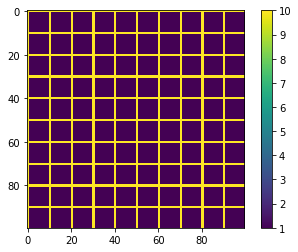

In [3]:
plt.imshow(image)
plt.colorbar()
plt.show()

In [4]:
starlet = StarletTransform()

coeffs = starlet.transform(image)
print(type(coeffs), len(coeffs), coeffs[0].shape)

Wavelet number of scales set to 7
<class 'list'> 7 (100, 100)


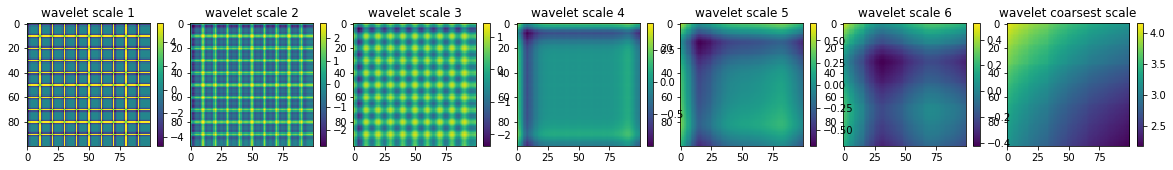

In [5]:
fig, axes = plt.subplots(1, starlet.nb_scale, figsize=(20, 3))
for l in range(starlet.nb_scale):
    ax = axes[l]
    if l < starlet.nb_scale-1:
        ax.set_title("wavelet scale {}".format(l+1))
    else:
        ax.set_title("wavelet coarsest scale")
    im = ax.imshow(coeffs[l])
    nice_colorbar(im)
plt.show()

Conclusion : the 1st gen starlet transform is **not positive**, hence one should _not_ apply the non-negativity constraint on wavelet coefficients !! 

<class 'numpy.ndarray'>


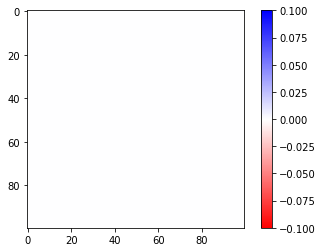

In [6]:
image_back = starlet.inverse(coeffs)
print(type(image_back))
plt.imshow(image-image_back, cmap='bwr_r')
plt.colorbar()
plt.show()